In [45]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold,
# with the increase in recall from the previous threshold used as the weight:
from sklearn.metrics import average_precision_score
from inspect import signature

In [19]:
breast_cancer = load_breast_cancer()

X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

In [20]:
encoder = LabelEncoder()
y = pd.Series(encoder.fit_transform(y))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [22]:
rf = RandomForestClassifier()

In [23]:
rf.fit(X_train, y_train)

/home/cory/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
probs = rf.predict_proba(X_test)

In [25]:
probs

array([[0.5, 0.5],
       [0.1, 0.9],
       [1. , 0. ],
       [0.1, 0.9],
       [0.5, 0.5],
       [0. , 1. ],
       [0.4, 0.6],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.7, 0.3],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.1, 0.9],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.9, 0.1],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.2, 0.8],
       [1. ,

In [28]:
malignant_probs = probs[:,1]

“A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.”

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, malignant_probs)

In [ ]:
roc_auc = auc(fpr, tpr)

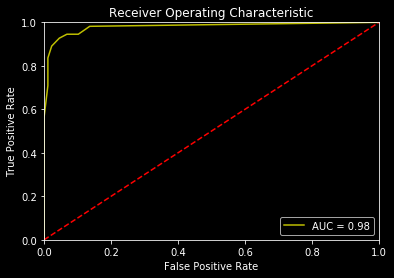

In [52]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The roc_auc_score function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. For more information see the Wikipedia article on AUC.

In [32]:
y_pred = rf.predict(X_test)

In [53]:
precision_score(y_test, y_pred)

0.9433962264150944

In [47]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.89')

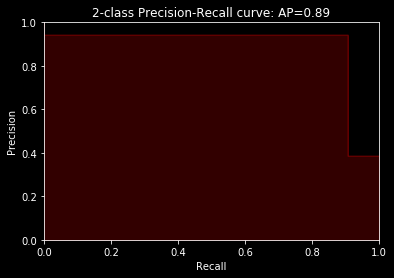

In [51]:
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))